# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data


In this project, the goal is to predict whether the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website at a cost of 62 million dollars, while other providers charge upwards of 165 million dollars per launch. A significant portion of these savings is attributed to SpaceX's ability to reuse the first stage.

This section involves performing Exploratory Data Analysis (EDA) and Feature Engineering.

Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


The following libraries will be imported for the lab:


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis


The SpaceX dataset will be read into a Pandas dataframe, and its summary will be printed.

In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


The relationship between FlightNumber (indicating continuous launch attempts) and PayloadMass will be explored to understand their impact on the launch outcome.

A plot will be created showing FlightNumber versus PayloadMass, with the launch outcome overlaid. It will be observed that as the flight number increases, the likelihood of the first stage landing successfully increases. Additionally, payload mass appears to be a factor, as even with more massive payloads, the first stage frequently returns successfully.

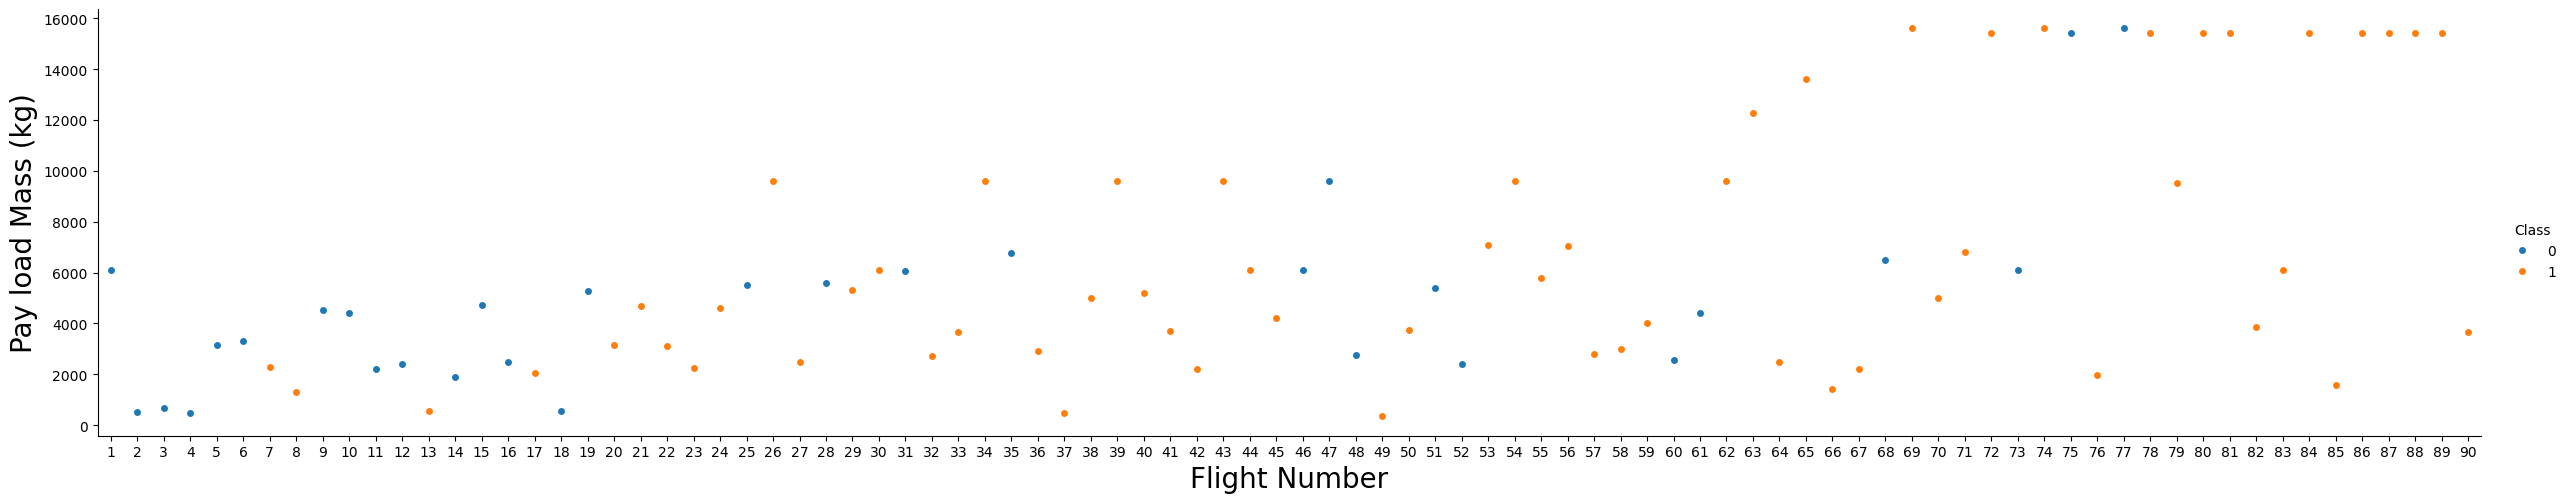

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### Visualize the relationship between Flight Number and Launch Site


The catplot function will be used to plot FlightNumber versus LaunchSite, with the x parameter set to FlightNumber, the y parameter set to LaunchSite, and the hue parameter set to 'class'.

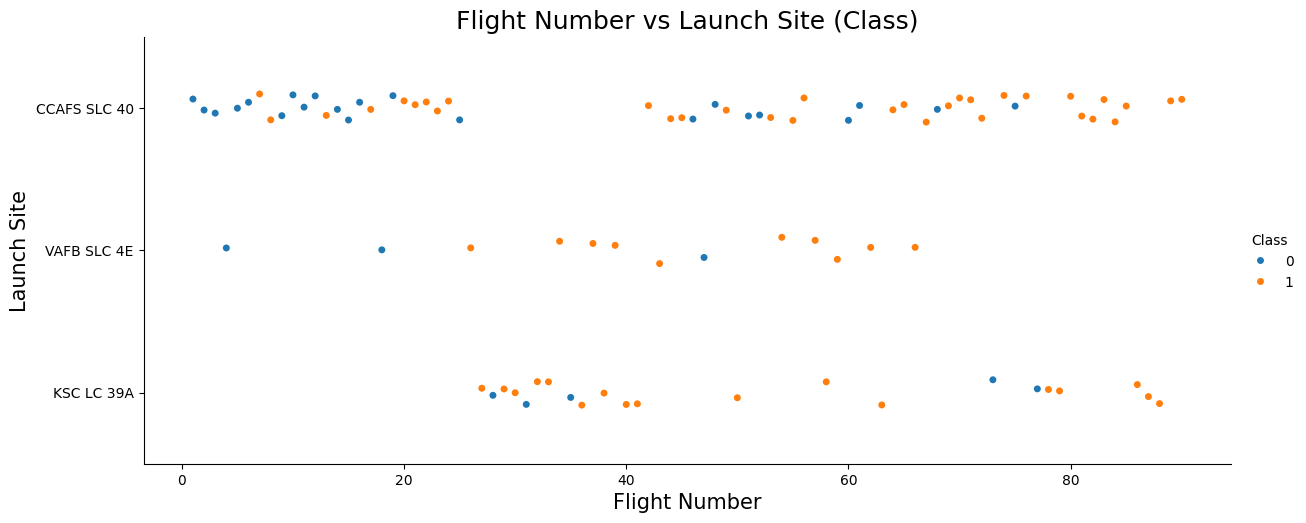

In [5]:
# Create a catplot to visualize the relationship between FlightNumber and LaunchSite
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, kind="strip", aspect=2.5)

# Customize plot labels and title
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs Launch Site (Class)", fontsize=18)

# Display the plot
plt.show()


The scatter plot reveals distinct patterns in the distribution of launches across various sites, with CCAFS SLC 40 showing the highest density of launch attempts.

CCAFS SLC 40: This launch site exhibits a significant concentration of flight numbers ranging from 0 to 20 and then from 45 to 85+. The scatter points are densely packed, with both successful (Class 1) and unsuccessful (Class 0) launches observed throughout these flight numbers. This indicates that CCAFS SLC 40 has been a frequent launch site with a mix of successful and unsuccessful landings over time.

VAFB SLC 4E: In contrast, VAFB SLC 4E has a much smaller number of launch points, scattered across the flight numbers from 0 to 60. The points are not as dense as those at CCAFS SLC 40, indicating fewer launches at this site. Similar to CCAFS SLC 40, both successful and unsuccessful launches are present, but the overall frequency of launches is lower.

KSC LC 39A: The flight number range for KSC LC 39A is between 25 and 40, with a few points extending from 55 to 85. The density of points is relatively lower compared to CCAFS SLC 40, indicating that KSC LC 39A has had fewer launches, especially beyond flight number 40. Both successful and unsuccessful landings are recorded, but the points are more spread out.

Conclusion:
The analysis indicates that CCAFS SLC 40 is the most active and frequently used launch site, with a high density of launches spread across various flight numbers. VAFB SLC 4E and KSC LC 39A show fewer launches, with KSC LC 39A demonstrating a smaller spread of launches, especially after flight number 40. The presence of both successful and unsuccessful landings at all sites suggests that, despite challenges, these sites have seen consistent launch activities over the years.




### Visualize the relationship between Payload Mass and Launch Site


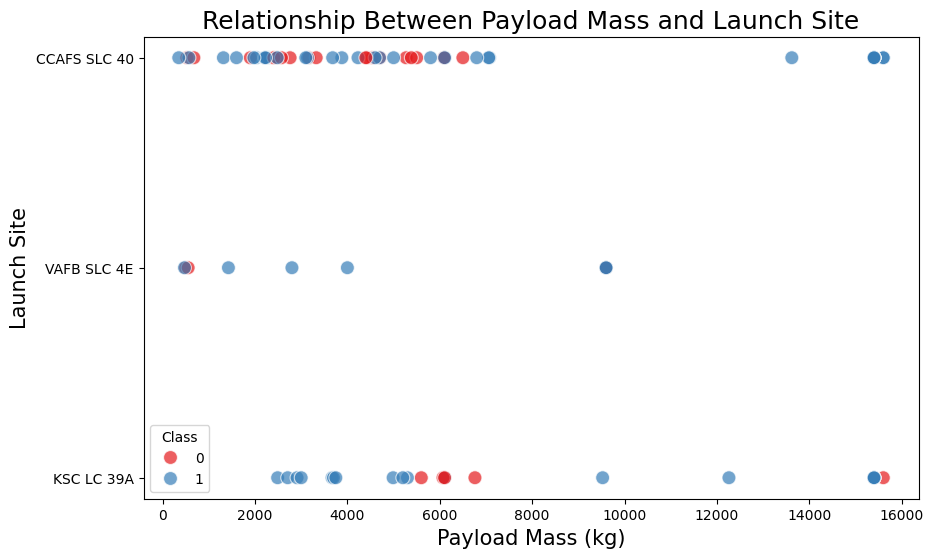

In [6]:
# Visualizing the relationship between Payload Mass and Launch Site using a scatter plot
plt.figure(figsize=(10, 6))

# Creating a scatter plot with Payload Mass on x-axis, Launch Site on y-axis, and hue for class
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, palette="Set1", s=100, alpha=0.7)

# Adding labels and title
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Relationship Between Payload Mass and Launch Site", fontsize=18)

# Display the plot
plt.show()


Observation from Payload Mass vs. Launch Site Scatter Plot:

1. The VAFB SLC 4E launch site has relatively fewer launches compared to the other sites.
2. Notably, VAFB SLC 4E does not have any launches with payload masses greater than 10,000 kg. This suggests that this launch site has not been used for missions involving heavy payloads.
3. On the other hand, other launch sites such as CCAFS SLC 40 and KSC LC 39A show a broader range of payload masses, including heavier payloads above 10,000 kg.
4. The lack of heavy payloads for VAFB SLC 4E might indicate that this site is either specialized for lighter payloads or that it has not been used for the heavier payloads during the observed timeframe.

### Visualize the relationship between success rate of each orbit type


<ipython-input-7-88ec158f117e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='viridis')


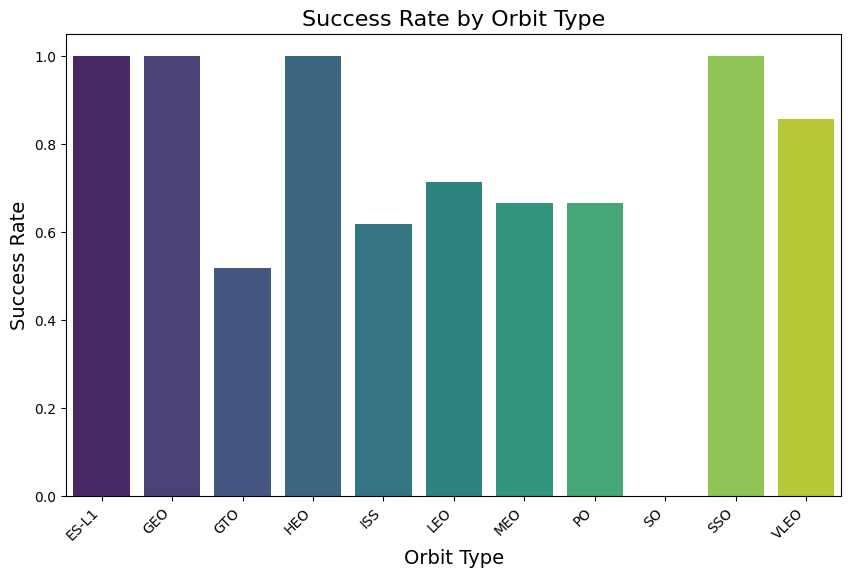

In [7]:
# Group by 'Orbit' and calculate the mean of 'Class' to get the success rate
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Plot a bar chart for the success rate of each orbit
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='viridis')

# Add labels and title
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()


Success Rate by Orbit Type:
Highest Success Rate (1.0): The ES-L1, GEO, and HEO orbit types show perfect success, with a 100% success rate for missions in these orbits.

Near-Perfect Success Rate (~1.0): The SSO orbit type demonstrates almost perfect success, closely followed by VLEO, which has a very high success rate of around 0.9.

Moderate Success Rate: The LEO, MEO, and PO orbit types have moderate success rates of around 0.7 to 0.6, indicating relatively higher numbers of successful launches but with room for improvement.

Lowest Success Rate (0.5): The GTO orbit type has the lowest success rate at 0.5, suggesting a significantly higher failure rate for missions in this orbit.

No Success: The SO orbit type has a success rate of 0, indicating that no missions in this orbit were successful.

This analysis highlights the varying success rates across orbit types, with GEO and HEO orbits having the highest success rates, while GTO and SO orbits face considerable challenges.

### Visualize the relationship between FlightNumber and Orbit type


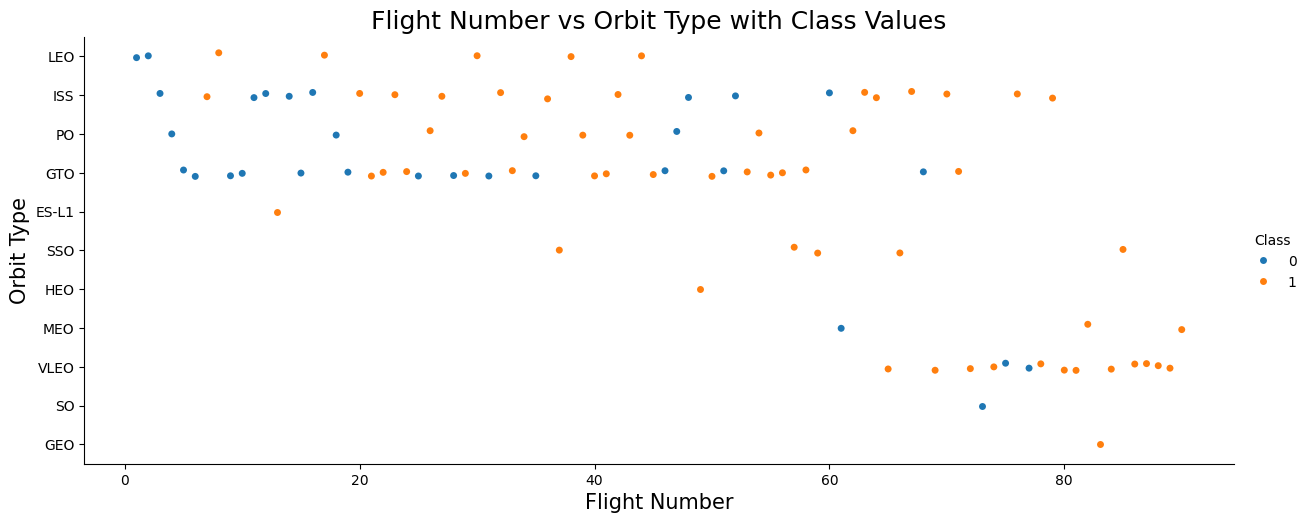

In [8]:
# TASK 4: Visualize the relationship between FlightNumber and Orbit type

# Plot a scatter point chart with x axis to be FlightNumber and y axis to be Orbit, and hue to be the Class value
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, kind="strip", aspect=2.5)

# Set labels for axes and plot
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs Orbit Type with Class Values", fontsize=18)
plt.show()


The scatter plot of Flight Number vs Orbit Type reveals interesting insights:

LEO Orbit (Low Earth Orbit): As the number of flights increases, the success rate appears to improve. This indicates a positive correlation between the number of launches and the likelihood of a successful mission in the LEO orbit.

GTO Orbit (Geostationary Transfer Orbit): In contrast, there is no clear relationship between the flight number and success for GTO. The scatter points are more spread out, with no evident pattern indicating success or failure as the number of launches increases.

### Visualize the relationship between Payload Mass and Orbit type


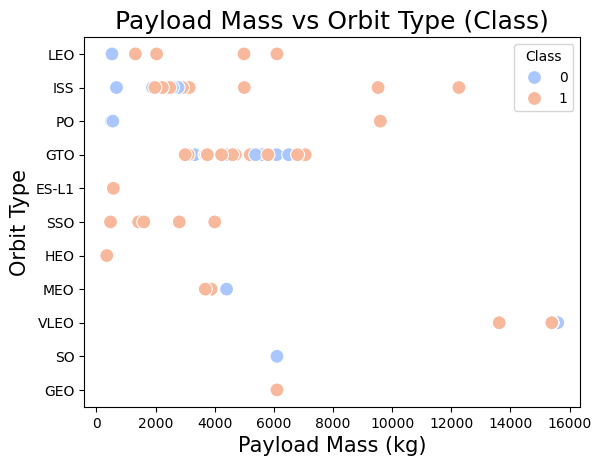

In [9]:
# Plotting the relationship between Payload Mass and Orbit type
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df, palette="coolwarm", s=100)

# Adding labels and title
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Payload Mass vs Orbit Type (Class)", fontsize=18)

# Show the plot
plt.show()


Analysis of Payload Mass vs Orbit Type
Polar (PO), LEO (Low Earth Orbit), and ISS (International Space Station) orbits:

For these orbit types, rockets with heavier payloads tend to have a higher success rate in landing. The positive landing rate (Class 1) is more concentrated among heavy payloads.
GTO (Geostationary Transfer Orbit):

In the GTO orbit, there is no clear distinction between successful and unsuccessful landings based on payload mass. Both outcomes (Class 0 and Class 1) are observed across a wide range of payload masses, making it harder to correlate success with payload size.
This highlights that while certain orbit types show clearer patterns between payload mass and landing success, GTO remains more variable and unpredictable.

### Visualize the launch success yearly trend


In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


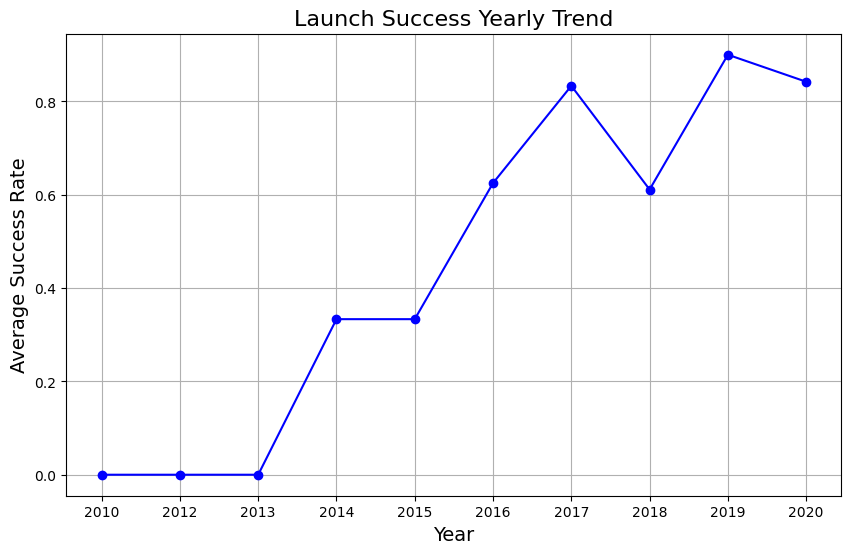

In [11]:
# Extract year from the Date column
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Apply the function to extract year and add it to the dataframe
df['Year'] = Extract_year()

# Calculate the success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].mean()

# Plotting the yearly trend of launch success
plt.figure(figsize=(10,6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Success Rate', fontsize=14)
plt.title('Launch Success Yearly Trend', fontsize=16)

plt.grid(True)
plt.show()


The success rate of SpaceX launches has steadily increased since 2013, reflecting continuous improvements in technology, operations, and experience, particularly from 2013 to 2020.

## Features Engineering


By this point, preliminary insights about how each important variable affects the success rate should have been obtained. The next step will involve selecting the features that will be used in success prediction in the future module.

In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Create dummy variables to categorical columns


The get_dummies function will be used on the features dataframe to apply OneHotEncoding to the columns Orbits, LaunchSite, LandingPad, and Serial. The resulting dataframe will be assigned to the variable features_one_hot. The results will be displayed using the head method, and the resulting dataframe will include all features, including the encoded ones.

In [13]:
# Creating dummy variables for categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=True)

# Display the result
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False


##### Cast all numeric columns to `float64`


Now that the features_one_hot dataframe only contains numbers, the entire dataframe will be cast to the variable type float64.

In [14]:
# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')

# Display the result
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Export it to CSV (remove the hashtag below to download):


In [ ]:
# features_one_hot.to_csv('dataset_part\_3.csv', index=False)

# SpaceX Falcon 9 First Stage Landing Prediction

## Introduction
The analysis aims to explore the factors influencing the success of Falcon 9 first stage landings, with a focus on the relationship between key features like flight number, launch site, payload mass, and orbit type. Many unsuccessful landings are controlled, planned ocean landings, reflecting the complexity of successful landings in various conditions.

## Exploratory Data Analysis

### Launch Site vs. Flight Number
The scatter plot of flight number versus launch site shows that **CCAFS SLC 40** is the most active site with a high density of launch attempts, particularly in the 0-20 and 45-85+ flight number ranges. **VAFB SLC 4E** and **KSC LC 39A** show fewer launches, with KSC LC 39A having a more spread-out distribution. Both successful and unsuccessful landings are observed across all sites, with CCAFS SLC 40 showing the most consistent launch activity.

### Payload Mass vs. Launch Site
The relationship between payload mass and launch site indicates that **VAFB SLC 4E** has a distinct lack of missions involving heavy payloads (greater than 10,000 kg), suggesting this site is specialized for lighter payloads. In contrast, **CCAFS SLC 40** and **KSC LC 39A** handle a broader range of payloads, including heavier ones.

### Success Rate by Orbit Type
The success rate of launches varies significantly across different orbit types:
- **ES-L1, GEO, and HEO** orbits achieve a perfect success rate of 100%.
- **SSO and VLEO** orbits have near-perfect success rates (~1.0).
- **LEO, MEO, and PO** orbits show moderate success rates around 0.6-0.7.
- **GTO** orbits have the lowest success rate (~0.5), while **SO** orbits had no successful missions during the observed period.

### Flight Number vs. Orbit Type
The relationship between flight number and orbit type reveals that **LEO** orbits show an improving success rate as flight numbers increase, suggesting better performance over time. On the other hand, **GTO** orbits show no clear pattern between flight number and success, indicating a more unpredictable success rate.

### Payload Mass vs. Orbit Type
In orbits like **LEO**, **PO**, and **ISS**, heavier payloads tend to have a higher success rate in landing, while **GTO** orbit shows no clear trend between payload mass and landing success. This highlights the variability of GTO compared to other orbits.

### Launch Success Trend Over the Years
The success rate of launches has steadily increased since 2013, reflecting improvements in SpaceX's technology and operational capabilities, particularly from 2013 to 2020.

## Feature Engineering
Following the exploratory data analysis, key features for predicting landing success have been identified. The next steps involve:
- **OneHotEncoding** categorical variables like orbit, launch site, landing pad, and serial number.
- **Casting numeric columns to `float64`** to ensure consistency in the dataset.

These features will be used in subsequent modeling to predict the success of Falcon 9 first stage landings.


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


## Completed by: 
Qazi Fabia Hoq


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
